### 20190905: Visualization of differential contact beween healthy and _L. pneumophila_-infected _A. castellanii_
**cmdoret**

Here I show visual comparisons of Hi-C contacts between infected (5h p.i.) and uninfected _A. castellanii_ at high (2kb) resolutions . 

In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')


In [4]:
os.getcwd()
os.chdir("/home/cmatthey/Repos/Acastellanii_legionella_infection/")

In [7]:
# Load files and packages
import numpy as np
import pandas as pd
import os
import warnings
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
import hicstuff.hicstuff as hcs
import hicstuff.view as hcv
import cooler
import pybedtools
import serpentine as serp


out = 'data/output/'
indir = 'data/input/'
healthy_cool = cooler.Cooler('sub_healthy.cool')
infected_cool = cooler.Cooler('sub_infected.cool')
#healthy_bedgraph = pd.read_csv(out + 'all_signals_AT419.bedgraph', sep='\t')
#infected_bedgraph = pd.read_csv(out + 'all_signals_AT418.bedgraph', sep='\t')
diff_loops = pd.read_csv(out + 'pareidolia/loops_change_infection_time.tsv', sep='\t')
genes = pd.read_csv(indir + 'annotations/c3_annotations/Acanthamoeba_castellanii_C3.gff3', sep='\t')
diff_genes = pd.read_csv(out + 'pareidolia/loops_diff_genes.bed', sep='\t', header=None, names=['chrom', 'start', 'end', 'name', 'diff_score', 'strand'])


Only regions with p-values below 10e-3 are selected as potential candidates. When replicates will be available, I will use FDR instead of simple p-value.

In [8]:
diff_genes.head()

,chrom,start,end,name,diff_score,strand
0,scaffold_1,11710,30748,NaN,-0.003060,VMHBD_00005
1,scaffold_1,11710,30748,NaN,-0.003060,VMHBD_00005
2,scaffold_1,11710,30748,NaN,0.066175,VMHBD_00005
3,scaffold_1,11710,30748,NaN,0.066175,VMHBD_00005
4,scaffold_1,30851,33592,NaN,-0.003060,VMHBD_00006


In [9]:
diff_loops.head()

,chrom1,start1,end1,chrom2,start2,end2,bin1,bin2,diff_score,snr
0,scaffold_1,12000,14000,scaffold_1,32000,34000,6.0,16.0,-0.003060,10.000000
1,scaffold_1,14000,16000,scaffold_1,52000,54000,7.0,26.0,0.066175,1.394129
2,scaffold_1,84000,86000,scaffold_1,106000,108000,42.0,53.0,0.009737,1.475195
3,scaffold_1,166000,168000,scaffold_1,186000,188000,83.0,93.0,0.037054,4.698209
4,scaffold_1,250000,252000,scaffold_1,272000,274000,125.0,136.0,-0.013748,5.375957


In [44]:
%matplotlib inline

region = 'scaffold_28'
region_start, region_end = infected_cool.extent(region)

inf_zoom = infected_cool.matrix(balance=False).fetch(region)
uni_zoom = healthy_cool.matrix(balance=False).fetch(region)
uni_norm = healthy_cool.matrix(balance=True).fetch(region)
inf_norm = infected_cool.matrix(balance=True).fetch(region)

serp_A, serp_B, serp_ratio = serp.serpentin_binning(
    inf_zoom,
    uni_zoom,
    parallel=1,
    triangular=True,
    iterations=10
)


2021-07-05 20:03:57.787662 Starting 10 binning processes...
0	 Total serpentines: 115440 (100.0 %)
1	 Total serpentines: 76531 (66.29504504504504 %)
2	 Total serpentines: 25888 (22.425502425502426 %)
3	 Total serpentines: 8816 (7.6368676368676365 %)
4	 Total serpentines: 3072 (2.6611226611226613 %)
5	 Total serpentines: 1256 (1.088011088011088 %)
6	 Total serpentines: 696 (0.6029106029106029 %)
7	 Total serpentines: 542 (0.4695079695079695 %)
8	 Total serpentines: 507 (0.4391891891891892 %)
9	 Total serpentines: 507 (0.4391891891891892 %)
9	 Over: 2021-07-05 20:04:00.368156
0	 Total serpentines: 115440 (100.0 %)
1	 Total serpentines: 76441 (66.21708246708246 %)
2	 Total serpentines: 25912 (22.446292446292446 %)
3	 Total serpentines: 8843 (7.660256410256411 %)
4	 Total serpentines: 3111 (2.694906444906445 %)
5	 Total serpentines: 1268 (1.0984060984060984 %)
6	 Total serpentines: 709 (0.6141718641718642 %)
7	 Total serpentines: 555 (0.4807692307692308 %)
8	 Total serpentines: 519 (0.4495

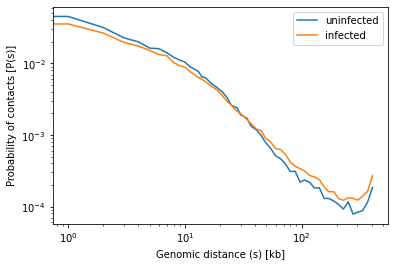

In [56]:
%matplotlib inline
idx, psi = hcs.distance_law_from_mat(np.nan_to_num(inf_norm))
_, psu = hcs.distance_law_from_mat(np.nan_to_num(uni_norm))
plt.loglog(idx, psu, label="uninfected")
plt.loglog(idx, psi, label="infected")
plt.xlabel('Genomic distance (s) [kb]')
plt.ylabel("Probability of contacts [P(s)]")
plt.legend()

Text(0.5, 0.98, 'A. castellanii, scaffold_28, 2kb')

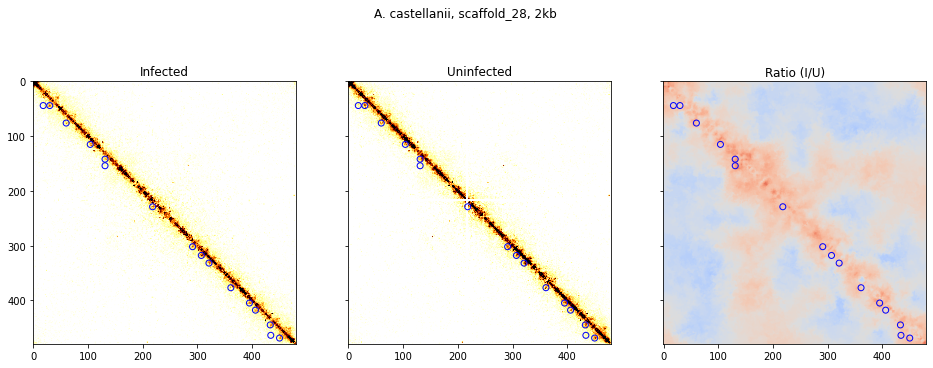

In [50]:
%matplotlib inline
fig, axes = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(16, 6))
axes[0].imshow(inf_norm, cmap='afmhot_r', vmax = np.percentile(inf_norm, 99.5))
axes[1].imshow(uni_norm, cmap='afmhot_r', vmax = np.percentile(inf_norm, 99.5))
axes[2].imshow(serp_ratio - np.median(serp_ratio), cmap='coolwarm', vmin=-2, vmax=2)
    
sub_loops = diff_loops.loc[diff_loops.chrom1 == region, :]
for i in range(3):
    axes[i].scatter(sub_loops.bin1 - region_start, sub_loops.bin2 - region_start, facecolor='none', edgecolor='blue')
axes[0].set_title("Infected")
axes[1].set_title("Uninfected")
axes[2].set_title("Ratio (I/U)")
plt.suptitle(f"A. castellanii, {region}, 2kb")

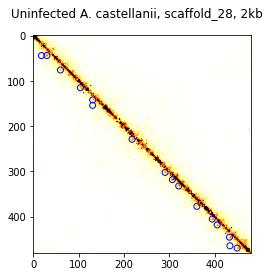

In [51]:
%matplotlib inline
plt.imshow(inf_norm, cmap='afmhot_r', vmax = np.percentile(inf_norm, 99.5), rasterized=True)
plt.scatter(sub_loops.bin1 - region_start, sub_loops.bin2 - region_start, facecolor='none', edgecolor='blue')
plt.suptitle(f"Uninfected A. castellanii, {region}, 2kb")
plt.savefig("uninfected_acastellanii_2kb_scf1.svg")

(0.0, 100000.0)

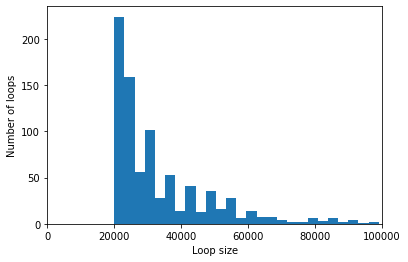

In [16]:
%matplotlib inline 
plt.hist(diff_loops.start2 - diff_loops.start1, 200)
plt.xlabel("Loop size")
plt.ylabel("Number of loops")
plt.xlim(0, 100000)